In [8]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv(r'C:\Users\Rajan Mishra Ji\Downloads\titanic3.csv')
print(data)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00  

C:\Users\Rajan Mishra Ji\AppData\Local\Temp\ipykernel_14808\4016952604.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


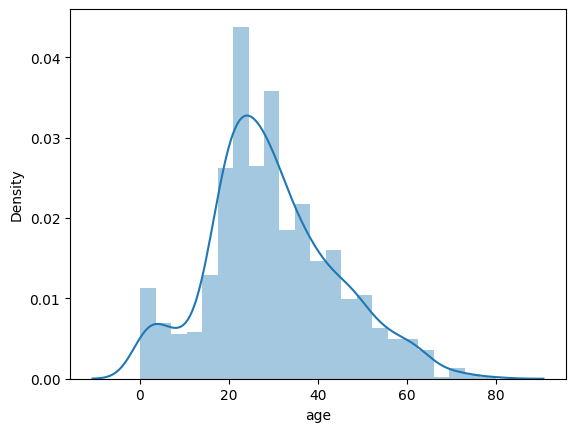

C:\Users\Rajan Mishra Ji\AppData\Local\Temp\ipykernel_14808\4016952604.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fare'])


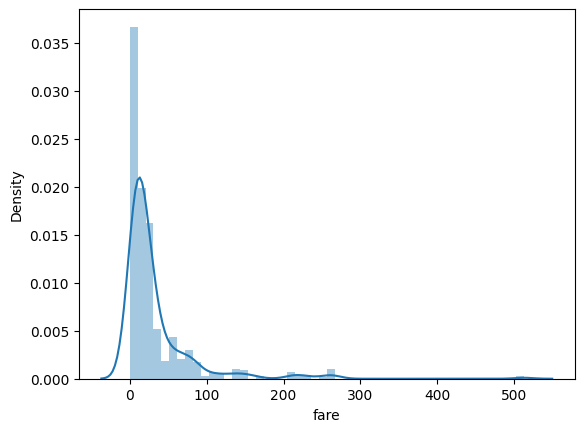

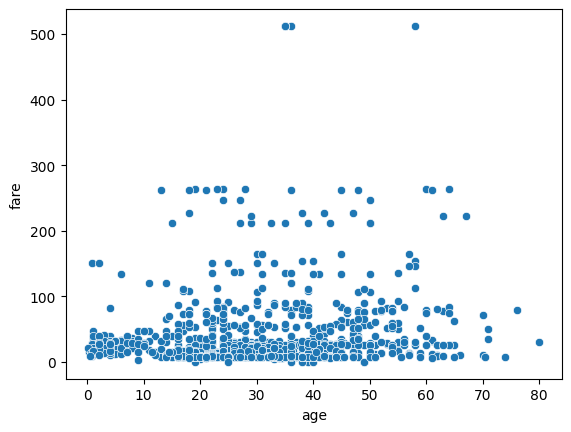

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of age
sns.distplot(data['age'])
plt.show()

# Visualize the distribution of fare
sns.distplot(data['fare'])
plt.show()

# Visualize the relationship between age and fare
sns.scatterplot(x='age', y='fare', data=data)
plt.show()

# Drop unnecessary columns
data = data.drop(['name', 'ticket', 'cabin', 'boat', 'body'], axis=1)

# Handle missing values
data['age'] = data['age'].fillna(data['age'].mean())
data['fare'] = data['fare'].fillna(data['fare'].mean())

# Encode categorical variables
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['pclass'] = data['pclass'].astype('category')
data['pclass'] = data['pclass'].cat.codes

# Create a new feature: family size
data['family_size'] = data['sibsp'] + data['parch'] + 1

# Drop unnecessary columns
data = data.drop(['sibsp', 'parch'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1047, 13)
X_test shape: (262, 13)
y_train shape: (1047,)
y_test shape: (262,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming 'data' is your DataFrame and has some non-numeric columns
X = data.drop('survived', axis=1)
y = data['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create the pipeline with the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       144
           1       0.99      0.94      0.97       118

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming 'data' is your DataFrame
X = data.drop('survived', axis=1)  # Features
y = data['survived']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that first preprocesses the data, then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9694656488549618
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       144
           1       0.99      0.94      0.97       118

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Confusion Matrix:
[[143   1]
 [  7 111]]


In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame
X = data.drop('survived', axis=1)  # Features
y = data['survived']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that first preprocesses the data, then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}
Best Score: 0.9770699475962635


In [26]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Example model and preprocessing setup (ensure this is trained)
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_new = pd.DataFrame(data, index=[0])
    y_pred = model.predict(X_new)
    return jsonify({'survived': int(y_pred[0])})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix